In [3]:
# 导入库
import akshare as ak
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [ ]:
# akshare 版本
print(ak.__version__)

In [5]:
# 获取白酒行业成分股数据

stocks = ak.stock_board_industry_cons_ths(symbol="白酒")
print(stocks)


    序号      代码     名称       现价   涨跌幅     涨跌    涨速    换手    量比    振幅     成交额  \
0    1  600696   岩石股份    26.54  3.23   0.83  0.00  1.16  4.20  7.27   1.04亿   
1    2  600519   贵州茅台  1789.00  1.02  18.13  0.08  0.17  1.72  2.03  37.42亿   
2    3  000568   泸州老窖   221.66  0.43   0.96  0.33  0.43  1.41  3.20  13.89亿   
3    4  002304   洋河股份   167.45  0.19   0.31  0.54  0.27  1.12  4.70   6.68亿   
4    5  000858    五粮液   183.80 -0.15  -0.28  0.30  0.30  1.01  2.73  21.10亿   
5    6  600559   老白干酒    28.54 -0.42  -0.12  0.18  2.35  1.35  3.87   6.01亿   
6    7  600779    水井坊    77.31 -0.54  -0.42  0.07  1.43  1.39  3.09   5.37亿   
7    8  603369    今世缘    49.72 -0.74  -0.37  0.18  0.51  1.11  2.94   3.17亿   
8    9  600702   舍得酒业   168.95 -0.84  -1.43  0.28  0.98  0.79  3.40   5.46亿   
9   10  000799    酒鬼酒   141.28 -0.84  -1.20  0.18  1.61  1.08  3.25   7.39亿   
10  11  000995  *ST皇台    17.36 -0.97  -0.17 -0.06  0.54  0.85  1.48   0.17亿   
11  12  002646   天佑德酒    15.78 -1.07  -0.17  0.25  1

In [ ]:
# print(stocks[["代码", "名称"]])
# 获取板块股票历年利润
df_stocks = pd.DataFrame()
for i in range(len(stocks)):
# for i in range(3):
    # print(stocks.loc[i, "代码"], stocks.loc[i, "名称"])
    market = 'sz'
    code = stocks.loc[i, "代码"]
    if (code.startswith('00') != True):
        market ='sh'
    symbol = "{}{}".format(market, code)
    profit_y = ak.stock_profit_sheet_by_yearly_em(symbol=symbol)
    print(profit_y["PARENT_NETPROFIT"][0:5])
    s1 = pd.Series(list(profit_y["PARENT_NETPROFIT"][0:5]), index=["2021-12-31", "2020-12-31", "2019-12-31", "2018-12-31", "2017-12-31"])
    print(s1)
    df_stocks[code] = s1
    # df.append(code, s1)
    # df.index = pd.to_datetime(profit_y["REPORT_DATE"]) 
    # df[code] = profit_y["PARENT_NETPROFIT"]

print(df_stocks)

    # print(profit_y[["REPORT_DATE", "SECURITY_CODE", "SECURITY_NAME_ABBR", "PARENT_NETPROFIT"]])

In [47]:
# 近5年利润柱状图

df_stocks.sort_index(ascending=True).plot(kind="bar")

,603589,002304,600559,000858,603369,600779,000568,000860,603919,000596,000799,603198,600519,600809,600197,002646,600199,600696,000995,600702
2017-12-31,1.113663e+09,6.627170e+09,1.635233e+08,9.673721e+09,8.958769e+08,3.354880e+08,2.557945e+09,4.383695e+08,2.529614e+08,1.148741e+09,1.760987e+08,6.666357e+08,2.707936e+10,9.523883e+08,3.533420e+08,-9.416427e+07,8.189819e+06,18034671.97,-1.184416e+08,1.435721e+08
2018-12-31,1.532664e+09,8.115190e+09,3.504180e+08,1.338425e+10,1.150711e+09,5.794499e+08,3.485643e+09,7.442559e+08,2.586163e+08,1.695232e+09,2.226788e+08,7.786927e+08,3.520363e+10,1.507044e+09,4.278862e+08,1.075746e+08,1.018888e+08,19220276.30,-9.548149e+07,3.417776e+08
2019-12-31,1.720205e+09,7.382823e+09,4.043029e+08,1.740216e+10,1.458098e+09,8.262813e+08,4.641989e+09,8.092294e+08,2.706052e+08,2.097528e+09,2.994957e+08,9.304456e+08,4.120647e+10,1.968933e+09,4.468211e+08,3.611826e+07,-2.044978e+08,12385608.65,6.821366e+07,5.079103e+08
2020-12-31,1.275742e+09,7.482229e+09,3.126039e+08,1.995481e+10,1.566908e+09,7.313258e+08,6.005723e+09,4.200088e+08,3.313173e+08,1.854576e+09,4.916083e+08,9.533871e+08,4.669729e+10,3.079234e+09,3.419111e+08,-1.150937e+08,6.940611e+07,8021898.87,3.348376e+07,5.811352e+08
2021-12-31,1.727088e+09,7.507683e+09,3.892063e+08,2.337707e+10,2.029128e+09,1.199076e+09,7.955554e+09,1.023021e+08,3.248430e+08,2.297894e+09,8.934892e+08,1.382021e+09,5.246014e+10,5.313612e+09,3.127557e+08,6.322478e+07,-1.664079e+08,61928159.20,-1.355476e+07,1.245655e+09


In [56]:
profit_y = ak.stock_profit_sheet_by_yearly_em(symbol="sh603589")
profit_y.to_csv("profit_603589.csv")

In [100]:
### 获取每股收益

df_eps = pd.DataFrame()
eps_dict = {}
for i in range(len(stocks)):
# for i in range(3):
    # print(stocks.loc[i, "代码"], stocks.loc[i, "名称"])
    market = 'sz'
    code = stocks.loc[i, "代码"]
    if (code.startswith('00') != True):
        market ='sh'
    symbol = "{}{}".format(market, code)
    print("获取({})利润表...".format(symbol))

    profit_y = ak.stock_profit_sheet_by_yearly_em(symbol=symbol)
    # print(profit_y["BASIC_EPS"])
    # print(profit_y)
    # s1 = pd.Series(list(profit_y["BASIC_EPS"][0:5]), index=["2021-12-31", "2020-12-31", "2019-12-31", "2018-12-31", "2017-12-31"])
    s1 = pd.Series(list(profit_y["BASIC_EPS"]), index=pd.to_datetime(profit_y["REPORT_DATE"]))
    eps_dict[code] = s1
    # print(s1)
    # df_eps[code] = s1
    # s1.to_csv("eps_{}.csv".format(code))
    # df.append(code, s1)
    # df.index = pd.to_datetime(profit_y["REPORT_DATE"]) 
    # df[code] = profit_y["PARENT_NETPROFIT"]

df_eps = pd.DataFrame(eps_dict)
# print(df_eps)

获取(sh600696)利润表...


获取(sh600519)利润表...


获取(sz000568)利润表...


获取(sz002304)利润表...


获取(sz000858)利润表...


获取(sh600559)利润表...


获取(sh600779)利润表...


获取(sh603369)利润表...


获取(sh600702)利润表...


获取(sz000799)利润表...


获取(sz000995)利润表...


获取(sz002646)利润表...


获取(sz000596)利润表...


获取(sh603589)利润表...


获取(sh600809)利润表...


获取(sh603919)利润表...


获取(sz000860)利润表...


获取(sh600197)利润表...


获取(sh600199)利润表...


获取(sh603198)利润表...


In [90]:
df_eps.to_csv("eps.csv")

In [101]:
df_eps.fillna(0, inplace=True)


In [102]:
print(type(df_eps.index))

<class 'pandas.core.indexes.datetimes.DatetimeIndex'>


In [107]:
df_eps['2010':]

,600696,600519,000568,002304,000858,600559,600779,603369,600702,000799,000995,002646,000596,603589,600809,603919,000860,600197,600199,603198
REPORT_DATE,,,,,,,,,,,,,,,,,,,,
2010-12-31,0.017,4.87,1.580,2.4500,1.158,0.30,0.4800,0.0000,0.2267,0.2621,-0.33,0.3791,1.34,0.00,1.1420,0.00,0.6051,0.3000,0.32,0.00
2011-12-31,0.060,8.44,2.080,3.7200,1.622,0.66,0.6560,1.1848,0.5787,0.6280,0.03,0.5426,1.17,0.73,0.9015,0.00,0.6997,0.4700,0.66,0.62
2012-12-31,0.071,12.82,3.140,5.7000,2.617,0.80,0.6913,1.5037,1.0965,1.5248,0.06,0.6699,1.44,0.84,1.5330,0.58,0.2869,0.5379,1.01,0.65
2013-12-31,0.026,13.25,2.460,4.6300,2.100,0.47,-0.3100,1.5140,0.0349,-0.1100,-0.17,0.8297,1.24,0.74,1.1092,0.52,0.4507,0.6185,0.24,0.59
2014-12-31,0.210,12.22,0.630,2.9900,1.537,0.42,-0.8245,1.3566,0.0397,-0.3000,-0.22,0.7050,1.19,0.78,0.4109,0.59,0.7124,0.6079,0.16,0.68
2015-12-31,-0.300,12.34,1.050,3.5600,1.627,0.21,0.1801,0.5462,0.0211,0.2726,0.01,0.5134,1.42,1.06,0.6013,0.79,0.6594,0.6393,0.09,0.69
2016-12-31,-0.720,13.31,1.396,3.8700,1.787,0.25,0.4601,0.6041,0.2378,0.3342,-0.93,0.4803,1.65,1.31,0.6989,0.65,0.7231,0.6277,0.03,0.85
2017-12-31,0.050,21.56,1.798,4.3976,2.548,0.27,0.6867,0.7141,0.4257,0.5420,-0.67,-0.2093,2.28,1.86,1.0999,0.69,0.7683,0.8012,0.01,0.83
2018-12-31,0.060,28.02,2.380,5.3850,3.474,0.41,1.1861,0.9173,1.0219,0.6853,-0.54,0.2391,3.37,2.55,1.7405,0.71,1.0034,0.9703,0.18,0.97


In [108]:
df_close

,600696,600519,000568
日期,,,
2016-01-22,48.81,1128.21,560.66
2016-01-25,43.89,1128.36,565.34
2016-01-26,39.47,1109.47,540.99
2016-01-27,35.48,1114.09,536.87
2016-01-28,36.17,1097.56,527.13
...,...,...,...
2022-12-09,67.64,9287.21,4349.06
2022-12-12,66.58,9332.54,4267.41
2022-12-13,67.83,9387.71,4330.15


In [ ]:
df_eps['2010':].plot(kind='bar')

In [ ]:
print(df_eps.mean().sort_values(ascending=False))

In [ ]:
df_eps.sort_index(ascending=True).plot(kind="bar", colormap="cubehelix",legend=False)

### 导出每股收益到csv

In [ ]:
profiet_y = ak.stock_profit_sheet_by_yearly_em(symbol="sh603919")
print(profit_y["BASIC_EPS"][0:5])
profiet_y.to_csv("profit_603919.csv")

In [ ]:
df_stocks.sort_index(ascending=True).pct_change().plot(kind="bar", colormap="cubehelix")

In [ ]:
import datetime

trade_date_list= ak.tool_trade_date_hist_sina()
all_trade_date = pd.to_datetime(trade_date_list["trade_date"])
all_trade_date.index = all_trade_date
print(all_trade_date)

ts = pd.Series(np.random.randn(len(trade_date_index)), index=trade_date_index)

enddate = datetime.datetime.now().strftime("%Y%m%d")
print(ts)
print(ts['2016-01-01':enddate])

In [11]:
# 导出白酒成分股到csv
stocks.to_csv("bj.csv")

In [68]:
#股票走势
import datetime

startdate = datetime.date(2016,1,1)
enddate = datetime.datetime.now().strftime("%Y%m%d")

trade_date_list= ak.tool_trade_date_hist_sina()
all_trade_date = pd.to_datetime(trade_date_list["trade_date"])
all_trade_date.index = all_trade_date
trade_date_index = all_trade_date[startdate:enddate]

df_close = pd.DataFrame()
for i in range(len(stocks)):
# for i in range(3):
    code = stocks.loc[i, "代码"]
    stock_hist = ak.stock_zh_a_hist(symbol=code, period="daily", start_date=startdate.strftime("%Y%m%d"), end_date=enddate, adjust="hfq")

    cl = stock_hist["收盘"]
    # if (len(cl) != len(trade_date_index)):
    #     print("股票数据长度不匹配:{}:{}-{}".format(len(cl), len(trade_date_index), code))
    #     continue

    ts = pd.Series(list(cl), index=pd.to_datetime(stock_hist["日期"]))
    # print(ts)
    # print(stock_hist["收盘"])
    df_close[code] = ts
    
# df_close.plot(subplots=True, figsize=(16,16))
# print(stock_hist)

            600696   600519   000568
日期                                  
2016-01-22   48.81  1128.21   560.66
2016-01-25   43.89  1128.36   565.34
2016-01-26   39.47  1109.47   540.99
2016-01-27   35.48  1114.09   536.87
2016-01-28   36.17  1097.56   527.13
...            ...      ...      ...
2022-12-09   67.64  9287.21  4349.06
2022-12-12   66.58  9332.54  4267.41
2022-12-13   67.83  9387.71  4330.15
2022-12-14   69.74  9492.58  4495.52
2022-12-15   71.38  9573.58  4470.24

[1593 rows x 3 columns]
              600696    600519    000568
日期                                      
2016-01-22       NaN       NaN       NaN
2016-01-25  0.899201  1.000133  1.008347
2016-01-26  0.808646  0.983390  0.964916
2016-01-27  0.726900  0.987485  0.957568
2016-01-28  0.741037  0.972833  0.940195
...              ...       ...       ...
2022-12-09  1.385782  8.231810  7.757036
2022-12-12  1.364065  8.271988  7.611404
2022-12-13  1.389674  8.320889  7.723308
2022-12-14  1.428806  8.413841  8.018264
20

<AxesSubplot:xlabel='日期'>

e:\Python\Python39\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 26085 (\N{CJK UNIFIED IDEOGRAPH-65E5}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
e:\Python\Python39\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 26399 (\N{CJK UNIFIED IDEOGRAPH-671F}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


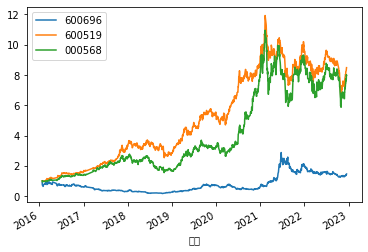

In [76]:
print(df_close)
ret = (1 + df_close.pct_change()).cumprod()
print(ret)
# ret.to_csv("ret.csv")
# df_close.to_csv("cl.csv")
ret.plot(kind="line")
# print(df_close.loc["2016-01-29",  :])
# print(df_close.resample('M').asfreq())